# Removing outliers - outlier trimming



In this notebook, we will remove observations that are beyond certain limits.

We we calculate those limits using:

- The IQR proximity rule
- The normal distribution
- The quantiles

In [54]:
# !pip install seaborn

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

In [56]:
# load the California House price data from Scikit-learn
X, y = fetch_california_housing(return_X_y=True, as_frame=True)

# let's separate the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=0,
)

# size
X_train.shape, X_test.shape

((14448, 8), (6192, 8))

In [57]:
X_train.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
1989,1.9750,52.0,2.800000,0.700000,193.0,4.825000,36.73,-119.79
256,2.2604,43.0,3.671480,1.184116,836.0,3.018051,37.77,-122.21
7887,6.2990,17.0,6.478022,1.087912,1387.0,3.810440,33.87,-118.04
4581,1.7199,17.0,2.518000,1.196000,3051.0,3.051000,34.06,-118.28
1993,2.2206,50.0,4.622754,1.161677,606.0,3.628743,36.73,-119.81


In [58]:
def plot_boxplot_and_hist(data, variable):
    
    # creating a figure composed of two matplotlib.Axes 
    # objects (ax_box and ax_hist)
    
    f, (ax_box, ax_hist) = plt.subplots(
        2, sharex=True, gridspec_kw={"height_ratios": (0.50, 0.85)}
    )

    # assigning a graph to each ax
    sns.boxplot(x=data[variable], ax=ax_box)
    sns.histplot(data=data, x=variable, ax=ax_hist)

    # Remove x axis name for the boxplot
    ax_box.set(xlabel="")
    plt.title(variable)
    plt.show()

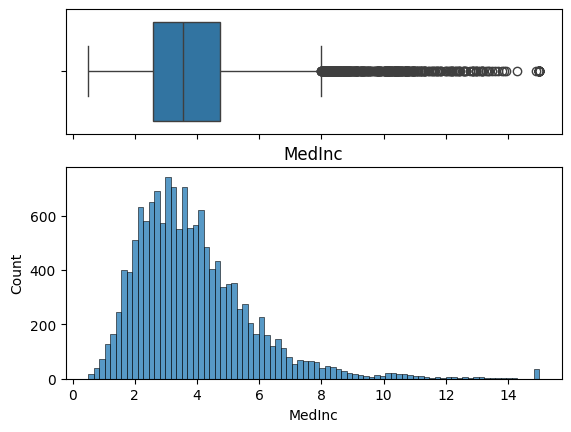

In [59]:
plot_boxplot_and_hist(X_train, "MedInc") #distribution of Median Income column

## IQR (Interquartile Range) proximity rule

In [60]:
def find_limits(df, variable, fold):

    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_limit = df[variable].quantile(0.25) - (IQR * fold)
    upper_limit = df[variable].quantile(0.75) + (IQR * fold)

    return lower_limit, upper_limit #Finds limits based on IQR

In [61]:
# we find the limits

lower_limit, upper_limit = find_limits(X_train, "MedInc", 3)
lower_limit, upper_limit

(np.float64(-3.925900000000002), np.float64(11.232600000000001))

In [62]:
# Remove outliers on the left

# ge: greater or equal than ==> True/False vector

inliers = X_train["MedInc"].ge(lower_limit)
X_train = X_train.loc[inliers]

inliers = X_test["MedInc"].ge(lower_limit)
X_test = X_test.loc[inliers]

In [63]:
# Remove outliers on the right

# le: lower or equal than ==> True/False vector

inliers = X_train["MedInc"].le(upper_limit)
X_train = X_train.loc[inliers]

inliers = X_test["MedInc"].le(upper_limit)
X_test = X_test.loc[inliers]

In [64]:
X_train.shape, X_test.shape

((14348, 8), (6151, 8))

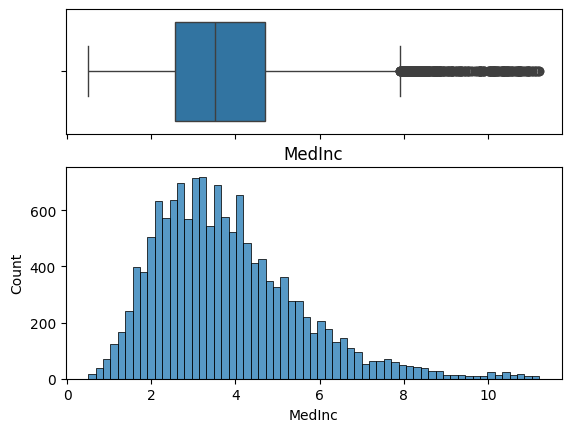

In [ ]:
plot_boxplot_and_hist(X_train, "MedInc") #removed some datapoints

# the black dots outside the limits  (|) are the outliers.

The moment we remove outliers, all the statistical parameters of the distribution change, and we could again see outliers. 


Hence, removing real outliers is not so straightforward.

## Normal distribution

In [66]:
def find_limits(df, variable, fold):

    lower_limit = df[variable].mean() - (df[variable].std() * fold)
    upper_limit = df[variable].mean() + (df[variable].std() * fold)

    return lower_limit, upper_limit

The rest of the procedure is identical.

In [67]:
# let's separate the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=0,
)

In [68]:
# we find the limits

lower_limit, upper_limit = find_limits(X_train, "MedInc", 3)
lower_limit, upper_limit

(np.float64(-1.8068060061060929), np.float64(9.54014082061329))

In [69]:
# Remove outliers on the left

# ge: greater or equal than ==> True/False vector

inliers = X_train["MedInc"].ge(lower_limit)
X_train = X_train.loc[inliers]

inliers = X_test["MedInc"].ge(lower_limit)
X_test = X_test.loc[inliers]

In [70]:
# Remove outliers on the right

# le: lower or equal than ==> True/False vector

inliers = X_train["MedInc"].le(upper_limit)
X_train = X_train.loc[inliers]

inliers = X_test["MedInc"].le(upper_limit)
X_test = X_test.loc[inliers]

In [71]:
X_train.shape, X_test.shape

((14211, 8), (6082, 8))

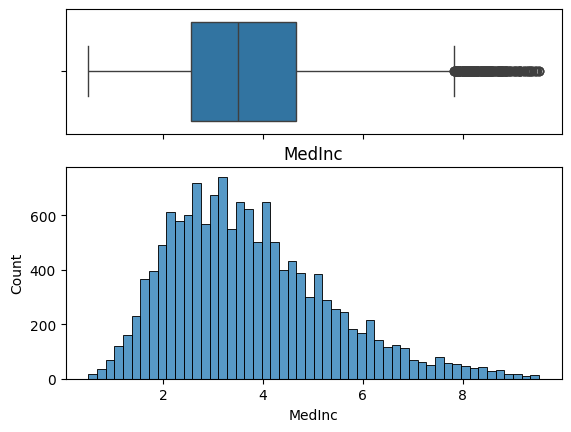

In [72]:
plot_boxplot_and_hist(X_train, "MedInc")

Still have outliers

## Quantiles

In [73]:
def find_limits(df, variable):
    lower_limit = X_train[variable].quantile(0.05) #5th quantile
    upper_limit = X_train[variable].quantile(0.95) #95th quantile   
    return lower_limit, upper_limit

In [74]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=0,
)

In [75]:
# we find the limits

lower_limit, upper_limit = find_limits(X_train, "MedInc")
lower_limit, upper_limit

(np.float64(1.60152), np.float64(7.284699999999999))

In [76]:
# Remove outliers on the left

# ge: greater or equal than ==> True/False vector

inliers = X_train["MedInc"].ge(lower_limit)
X_train = X_train.loc[inliers]

inliers = X_test["MedInc"].ge(lower_limit)
X_test = X_test.loc[inliers]

In [77]:
# Remove outliers on the right

# le: lower or equal than ==> True/False vector

inliers = X_train["MedInc"].le(upper_limit)
X_train = X_train.loc[inliers]

inliers = X_test["MedInc"].le(upper_limit)
X_test = X_test.loc[inliers]

In [78]:
X_train.shape, X_test.shape

((13002, 8), (5557, 8))

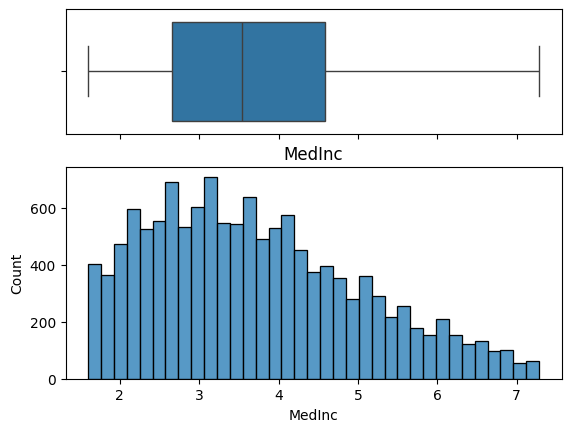

In [79]:
plot_boxplot_and_hist(X_train, "MedInc")

No more outliers should be present now.